# FFT
**Example consists of:**
- Generating noisy signal that consists of two sinusoidal signals with two times difference in amplitude and random noise signals with different frequencies and amplitudes 25% of maximum amplitude
- Taking FFT of this signal
- Recovering of the signal with max amplitude using inverse FFT

2
0.2


c:\Users\tko\AppData\Local\anaconda3\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\tko\AppData\Local\anaconda3\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


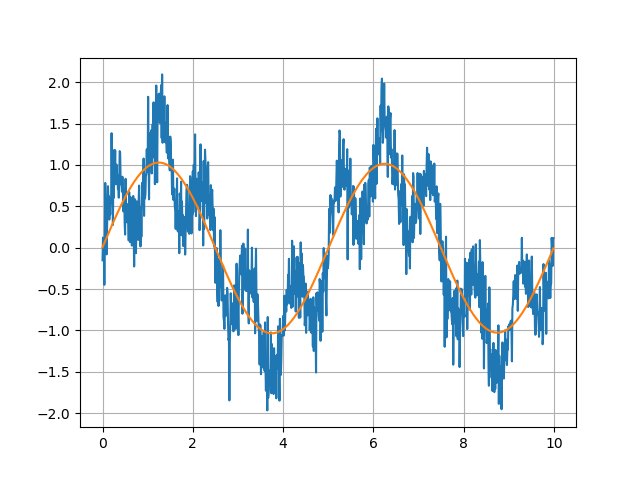

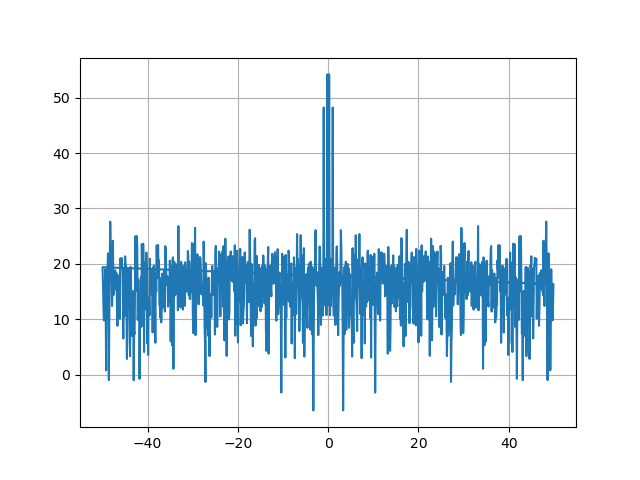

In [1]:
import numpy as np
from scipy import fftpack

%matplotlib widget
import matplotlib.pyplot as plt

#Time vector generating
timeStep = 0.01
t = np.arange(0, 10, timeStep)

#Noisy signal generating
sig = (np.sin(2*np.pi*0.2*t) + 0.25*np.random.randn(t.size) + 0.5*np.sin(2*np.pi*t))

#FFT of noisy signal
sigFFT = fftpack.fft(sig)
sigAmp = np.abs(sigFFT)
sampleFreq = fftpack.fftfreq(sig.size, d=timeStep)
sigAmpLog = 20*np.log10(sigAmp) #using dBV to represent the amplitudes in frequency domain

#Finding frequency of max amplitude of noisy signal 
ampFreq = np.array([sigAmp, sampleFreq])
ampPos = ampFreq[0,:].argmax()
peakFreq = ampFreq[1, ampPos]
print(ampPos)
print(peakFreq)


#Inverse FFT i.e. recovering the useful signal from the noisy signal
highFreqFFT = sigFFT.copy()
highFreqFFT[np.abs(sampleFreq) > peakFreq] = 0 #totally unclear manipulation
filtSig = fftpack.ifft(highFreqFFT)


#Plotting the data
plt.figure()
plt.plot(t, sig)
plt.plot(t, filtSig)
plt.grid()
plt.figure()
plt.plot(sampleFreq, sigAmpLog)
plt.grid()